# Analisis de uno de los archivos de salida

Vamos a normalizar las coordenads, y también a analizar la distancia al hisopo

  Observation  frame_idx       O_D.x       O_D.y       O_I.x       O_I.y  \
0        Nada         25  396.907142  142.331609  359.406562  140.728690   
1        Nada         26  393.656866  139.118009  360.293985  138.571558   
2        Nada         27  390.562597  135.699512  360.847836  136.034588   
3        Nada         28  390.562597  135.699512  360.847836  136.034588   
4        Nada         29  390.562597  135.699512  360.847836  136.034588   

      Nariz.x     Nariz.y      Lomo.x      Lomo.y      Base.x      Base.y  \
0  318.393127  133.334057  360.771667  110.395309  372.412247  196.521484   
1  336.926819  119.135434  360.720093  110.386368  359.759664  197.301020   
2  339.688828  107.118519  360.722198  110.385910  359.759664  197.301020   
3  339.688828  107.118519  350.927551   91.082939  355.900314  162.614029   
4  339.688828  107.118519  350.889526   91.073448  353.548840  141.830656   

     Frente.x    Frente.y    Cabeza.x    Cabeza.y  nariz_hisopo  \
0  360.453888

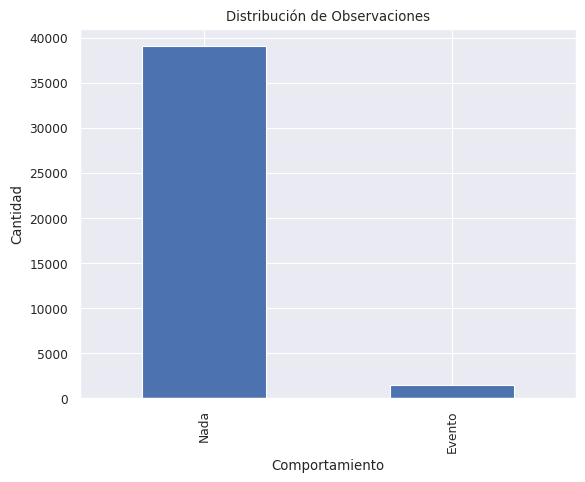

{'Gini Index': 0.06996606279913564, 'Shannon Index': 0.1560041182827381, 'Min-Max Ratio': 0.03766816143497758, 'Chi2 p-value': 1.0, 'Balanced': False}


In [125]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

# Cargar el CSV con los datos de posiciones del ratón
# Asegúrate de ajustar el path al archivo CSV correcto
csv_path = 'Observaciones con dataset/B-4.csv'  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(csv_path)

# Definir las dimensiones de la imagen
width = 520
height = 245

# Función para normalizar las coordenadas
def normalizar_coordenadas(df):
    cols_x = [col for col in df.columns if '.x' in col]
    cols_y = [col for col in df.columns if '.y' in col]
    
    df[cols_x] = df[cols_x] / width
    df[cols_y] = df[cols_y] / height
    return df
    
# Función para calcular la distancia entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calcular el ángulo formado por los puntos: Cabeza - Lomo - Base
def calcular_angulo(df):
    # Vectores entre los puntos
    vector1 = np.column_stack((df['Cabeza.x'] - df['Lomo.x'], df['Cabeza.y'] - df['Lomo.y']))
    vector2 = np.column_stack((df['Base.x'] - df['Lomo.x'], df['Base.y'] - df['Lomo.y']))

    # Producto punto y normas de los vectores
    dot_product = np.einsum('ij,ij->i', vector1, vector2)
    norm1 = np.linalg.norm(vector1, axis=1)
    norm2 = np.linalg.norm(vector2, axis=1)

    # Ángulo entre los vectores
    angles = np.arccos(dot_product / (norm1 * norm2))
    return np.degrees(angles)  # Convertir a grados

# Función para extraer características del comportamiento
def extraer_caracteristicas(df):
    # Distancia de la nariz al hisopo (270, 50)
    df['nariz_hisopo'] = calcular_distancia(df['Nariz.x'], df['Nariz.y'], 270, 50)
    df['cabeza_hisopo'] = calcular_distancia(df['Cabeza.x'], df['Cabeza.y'], 270, 50)
    
    # Distancia entre oreja derecha e izquierda
    df['long_cuerpo'] = calcular_distancia(df['Cabeza.x'], df['Cabeza.y'], df['Base.x'], df['Base.y'])

    df['ang_cuerpo'] = calcular_angulo(df)

    return df

# Aplicamos las funciones a los datos
df = extraer_caracteristicas(df)

print(df.head())  # Mostrar una muestra del dataframe resultante

# Estadísticas básicas de las observaciones
observation_counts = df['Observation'].value_counts()
print(observation_counts)

# Visualización del balance de las clases
observation_counts.plot(kind='bar', title='Distribución de Observaciones', ylabel='Cantidad', xlabel='Comportamiento')
plt.show()

from scipy.stats import entropy, chi2_contingency

def evaluar_balanceo(observations):
    # Calcular conteos
    counts = observations.value_counts()
    total = counts.sum()

    # Índice de Gini
    gini_index = 1 - sum((counts / total) ** 2)

    # Índice de Shannon (Entropía)
    shannon_index = entropy(counts)

    # Ratio Min-Max
    min_max_ratio = counts.min() / counts.max()

    # Test Chi-Cuadrado
    chi2, p_value = chi2_contingency([counts.values])[0:2]

    # Umbrales de balanceo
    is_balanced = min_max_ratio > 0.5 and gini_index > 0.5 and p_value > 0.05

    return {
        "Gini Index": gini_index,
        "Shannon Index": shannon_index,
        "Min-Max Ratio": min_max_ratio,
        "Chi2 p-value": p_value,
        "Balanced": is_balanced
    }

# Evaluar balanceo de las observaciones
resultado_balanceo = evaluar_balanceo(df['Observation'])
print(resultado_balanceo)


      Observation  frame_idx       O_D.x       O_D.y       O_I.x       O_I.y  \
10450        Nada      10570  289.276947  159.158569  292.656464  162.656982   
24030        Nada      24235  324.967133  120.244537  328.036194  113.721619   
15976        Nada      16135  155.596008  162.536453  166.416122  165.504929   
37513        Nada      37761  337.943939  185.719589  350.681763  185.714005   
10453        Nada      10573  289.300140  159.164169  292.654877  162.663605   

          Nariz.x     Nariz.y      Lomo.x      Lomo.y      Base.x      Base.y  \
10450  266.913635  185.436127  344.703247  162.267578  373.708679  191.422714   
24030  350.682037  120.012207  273.030426  142.753571  259.214844  172.635559   
15976  149.374298  195.196472  198.096466  152.853333  208.093949  179.962909   
37513  325.434967  214.624695  415.856171  175.386673  438.469391  205.116898   
10453  266.978363  185.509933  347.469482  162.356049  373.696014  191.378860   

         Frente.x    Frente.y   

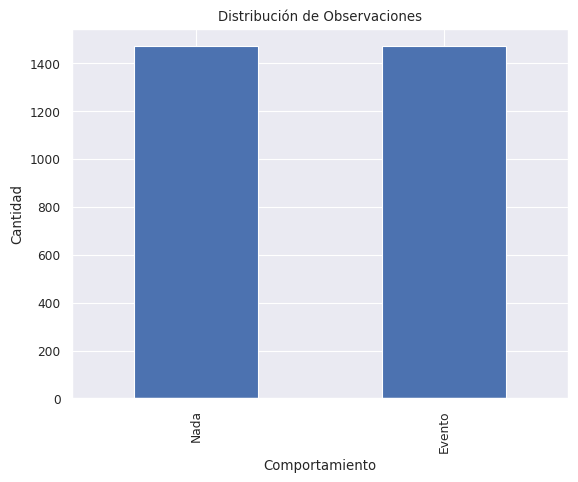

{'Gini Index': 0.5, 'Shannon Index': 0.6931471805599453, 'Min-Max Ratio': 1.0, 'Chi2 p-value': 1.0, 'Balanced': False}


In [126]:
from sklearn.utils import resample

# Separar datos mayoritarios y minoritarios
df_majority = df[df['Observation'] == 'Nada']
df_minority = df[df['Observation'] != 'Nada']

# Submuestrear la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=1024)

# Combinar datos submuestreados con los minoritarios
df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced.head())

# Estadísticas básicas de las observaciones
observation_counts_balanced = df_balanced['Observation'].value_counts()
print(observation_counts_balanced)

# Visualización del balance de las clases
observation_counts_balanced.plot(kind='bar', title='Distribución de Observaciones', ylabel='Cantidad', xlabel='Comportamiento')
plt.show()

# Evaluar balanceo de las observaciones
resultado_balanceo = evaluar_balanceo(df_balanced['Observation'])
print(resultado_balanceo)

In [127]:
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import matplotlib.pyplot as plt

# Seleccionar columnas de interés (excluyendo la columna 'Observation' y 'frame_idx' si está presente)
columnas_interes = [col for col in df_balanced.columns if col not in ['Observation', 'frame_idx']]

# Definir el número de columnas y filas para la grilla de plots
n_cols = 3
n_rows = (len(columnas_interes) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Aplicar ANOVA y Kruskal-Wallis para evaluar diferencias entre clases para cada columna
resultados_anova = {}
resultados_kruskal = {}

for col in columnas_interes:
    # Preparar datos para ANOVA y Kruskal-Wallis
    grupos = [df_balanced[df_balanced['Observation'] == clase][col] for clase in df_balanced['Observation'].unique()]
    
    # ANOVA
    anova_result = f_oneway(*grupos)
    resultados_anova[col] = anova_result.pvalue
    
    # Kruskal-Wallis (alternativa no paramétrica)
    kruskal_result = kruskal(*grupos)
    resultados_kruskal[col] = kruskal_result.pvalue

# Convertir los resultados en DataFrames para visualización
df_resultados_anova = pd.DataFrame(list(resultados_anova.items()), columns=['Columna', 'p-valor ANOVA']).sort_values(by='p-valor ANOVA')
df_resultados_kruskal = pd.DataFrame(list(resultados_kruskal.items()), columns=['Columna', 'p-valor Kruskal']).sort_values(by='p-valor Kruskal')

# Mostrar resultados estadísticos de ANOVA y Kruskal-Wallis
print("\nResultados ANOVA:")
print(df_resultados_anova.head(10))

print("\nResultados Kruskal-Wallis:")
print(df_resultados_kruskal.head(10))



Resultados ANOVA:
          Columna  p-valor ANOVA
14   nariz_hisopo   1.398386e-10
15  cabeza_hisopo   1.272410e-09
8          Base.x   3.582950e-08
6          Lomo.x   9.943497e-05
1           O_D.y   3.063438e-04
13       Cabeza.y   1.109989e-03
11       Frente.y   1.447017e-03
5         Nariz.y   1.544372e-03
2           O_I.x   3.613672e-03
3           O_I.y   9.516173e-03

Resultados Kruskal-Wallis:
          Columna  p-valor Kruskal
14   nariz_hisopo     6.635660e-10
15  cabeza_hisopo     5.539988e-09
8          Base.x     4.386925e-06
17     ang_cuerpo     1.401864e-04
1           O_D.y     3.238194e-04
11       Frente.y     6.201014e-04
5         Nariz.y     8.609631e-04
13       Cabeza.y     1.151834e-03
6          Lomo.x     3.308628e-03
2           O_I.x     1.275090e-02


Accuracy: 0.5895691609977324

Classification Report:
               precision    recall  f1-score   support

      Evento       0.59      0.60      0.59       221
        Nada       0.59      0.58      0.59       220

    accuracy                           0.59       441
   macro avg       0.59      0.59      0.59       441
weighted avg       0.59      0.59      0.59       441



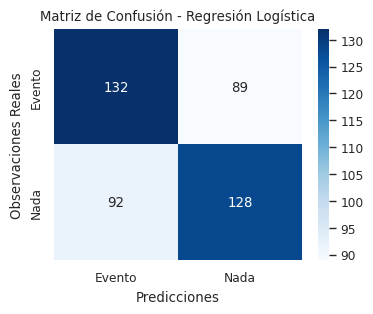

Accuracy - Random Forest: 0.8321995464852607

Classification Report - Random Forest:
               precision    recall  f1-score   support

      Evento       0.83      0.83      0.83       221
        Nada       0.83      0.83      0.83       220

    accuracy                           0.83       441
   macro avg       0.83      0.83      0.83       441
weighted avg       0.83      0.83      0.83       441



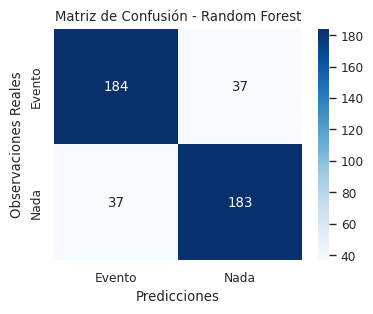

Accuracy - SVM: 0.6689342403628118

Classification Report - SVM:
               precision    recall  f1-score   support

      Evento       0.67      0.67      0.67       221
        Nada       0.67      0.66      0.67       220

    accuracy                           0.67       441
   macro avg       0.67      0.67      0.67       441
weighted avg       0.67      0.67      0.67       441



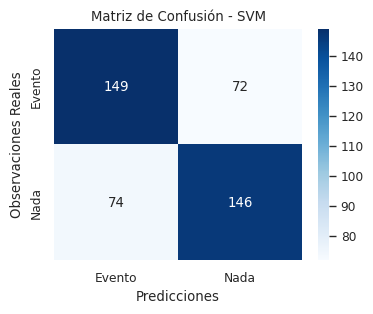

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Dimensiones de la imagen
width = 520
height = 245

# Función para normalizar las coordenadas
def normalizar_coordenadas(df):
    cols_x = [col for col in df.columns if '.x' in col]
    cols_y = [col for col in df.columns if '.y' in col]
    
    # Normalizar por las dimensiones de la imagen
    df[cols_x] = df[cols_x] / width
    df[cols_y] = df[cols_y] / height
    return df

# Selección de características (excluyendo 'Observation' y 'frame_idx')
X = df_balanced.drop(columns=['Observation', 'frame_idx'])
y = df_balanced['Observation']

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Crear el pipeline para normalizar las coordenadas y luego aplicar StandardScaler
pipeline = Pipeline([
    ('normalizar_coordenadas', FunctionTransformer(normalizar_coordenadas, validate=False)),
    ('scaler', StandardScaler())
])

# Ajustar el pipeline y transformar los datos de entrenamiento y prueba
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

# Modelo de Regresión Logística
model_lr = LogisticRegression(random_state=42, max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model_lr.predict(X_test_scaled)

# Evaluación del Modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Visualización de la Matriz de Confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model_lr.classes_, yticklabels=model_lr.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Regresión Logística')
plt.show()

from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
model_rf = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model_rf.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_rf = model_rf.predict(X_test_scaled)
print("Accuracy - Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

from sklearn.svm import SVC

# Modelo SVM
model_svm = SVC(random_state=42, class_weight='balanced', kernel='rbf')
model_svm.fit(X_train_scaled, y_train)

# Predicciones y Evaluación
y_pred_svm = model_svm.predict(X_test_scaled)
print("Accuracy - SVM:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues', xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - SVM')
plt.show()


Accuracy con Características Seleccionadas - Random Forest Refinado: 0.8072562358276644

Classification Report - Modelo Refinado:
               precision    recall  f1-score   support

      Evento       0.80      0.82      0.81       221
        Nada       0.82      0.79      0.80       220

    accuracy                           0.81       441
   macro avg       0.81      0.81      0.81       441
weighted avg       0.81      0.81      0.81       441



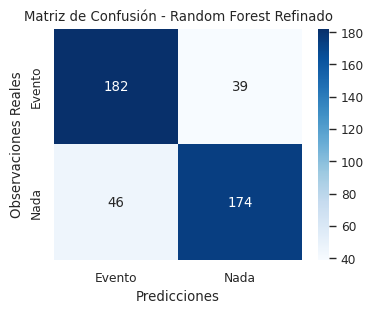

Resultados de Validación Cruzada (10-Fold) - Random Forest Refinado:
Media de Accuracy: 0.8259
Desviación Estándar: 0.0344
Scores de cada fold: [0.816      0.84       0.832      0.848      0.824      0.832
 0.84       0.872      0.872      0.792      0.776      0.88
 0.76       0.84       0.784      0.88       0.832      0.784
 0.8        0.81451613]


In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar nuevamente el modelo Random Forest con las características seleccionadas
model_rf_refined = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model_rf_refined.fit(X_train_selected, y_train)

# Predicción en el conjunto de prueba
y_pred_rf_refined = model_rf_refined.predict(X_test_selected)

# Evaluar el modelo refinado
print("Accuracy con Características Seleccionadas - Random Forest Refinado:", accuracy_score(y_test, y_pred_rf_refined))
print("\nClassification Report - Modelo Refinado:\n", classification_report(y_test, y_pred_rf_refined))

# Visualizar la Matriz de Confusión
plt.figure(figsize=(4, 3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_refined), annot=True, fmt='d', cmap='Blues', xticklabels=model_rf_refined.classes_, yticklabels=model_rf_refined.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Random Forest Refinado')
plt.show()

# Validación Cruzada para asegurar la generalización del modelo
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model_rf_refined, X_train_selected, y_train, cv=cv, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Resultados de Validación Cruzada (10-Fold) - Random Forest Refinado:")
print(f"Media de Accuracy: {cross_val_scores.mean():.4f}")
print(f"Desviación Estándar: {cross_val_scores.std():.4f}")

# Mostrar los detalles de las puntuaciones de cada iteración de la validación cruzada
print("Scores de cada fold:", cross_val_scores)


  Observation  frame_idx       O_D.x       O_D.y       O_I.x       O_I.y  \
0        Nada         25  396.907142  142.331609  359.406562  140.728690   
1        Nada         26  393.656866  139.118009  360.293985  138.571558   
2        Nada         27  390.562597  135.699512  360.847836  136.034588   
3        Nada         28  390.562597  135.699512  360.847836  136.034588   
4        Nada         29  390.562597  135.699512  360.847836  136.034588   

      Nariz.x     Nariz.y      Lomo.x      Lomo.y      Base.x      Base.y  \
0  318.393127  133.334057  360.771667  110.395309  372.412247  196.521484   
1  336.926819  119.135434  360.720093  110.386368  359.759664  197.301020   
2  339.688828  107.118519  360.722198  110.385910  359.759664  197.301020   
3  339.688828  107.118519  350.927551   91.082939  355.900314  162.614029   
4  339.688828  107.118519  350.889526   91.073448  353.548840  141.830656   

     Frente.x    Frente.y    Cabeza.x    Cabeza.y  nariz_hisopo  \
0  360.453888

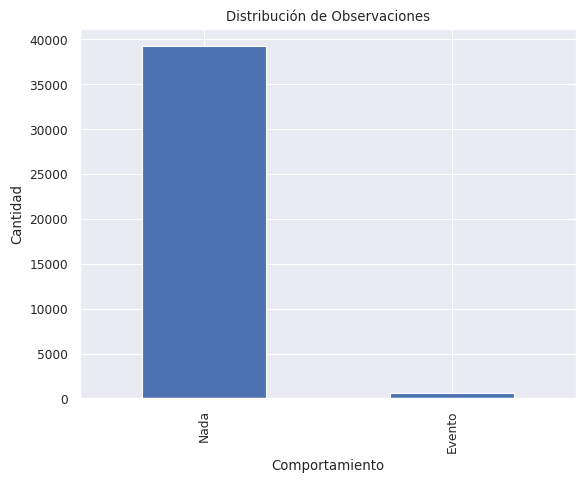

{'Gini Index': 0.030418702623241867, 'Shannon Index': 0.0797504457437731, 'Min-Max Ratio': 0.015690376569037656, 'Chi2 p-value': 1.0, 'Balanced': False}


In [132]:
# Cargar el nuevo CSV con los datos de posiciones del ratón
csv_path_nuevo = 'Observaciones con dataset/C-3.csv'  # Reemplaza con la ruta correcta al nuevo archivo
df_nuevo = pd.read_csv(csv_path_nuevo)

# Función para calcular la distancia entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calcular el ángulo formado por los puntos: Cabeza - Lomo - Base
def calcular_angulo(df):
    # Vectores entre los puntos
    vector1 = np.column_stack((df['Cabeza.x'] - df['Lomo.x'], df['Cabeza.y'] - df['Lomo.y']))
    vector2 = np.column_stack((df['Base.x'] - df['Lomo.x'], df['Base.y'] - df['Lomo.y']))

    # Producto punto y normas de los vectores
    dot_product = np.einsum('ij,ij->i', vector1, vector2)
    norm1 = np.linalg.norm(vector1, axis=1)
    norm2 = np.linalg.norm(vector2, axis=1)

    # Ángulo entre los vectores
    angles = np.arccos(dot_product / (norm1 * norm2))
    return np.degrees(angles)  # Convertir a grados

# Función para extraer características del comportamiento
def extraer_caracteristicas(df):
    # Distancia de la nariz al hisopo (270, 50)
    df['nariz_hisopo'] = calcular_distancia(df['Nariz.x'], df['Nariz.y'], 270, 50)
    df['cabeza_hisopo'] = calcular_distancia(df['Cabeza.x'], df['Cabeza.y'], 270, 50)
    
    # Distancia entre oreja derecha e izquierda
    df['long_cuerpo'] = calcular_distancia(df['Cabeza.x'], df['Cabeza.y'], df['Base.x'], df['Base.y'])

    df['ang_cuerpo'] = calcular_angulo(df)

    return df

# Aplicamos las funciones a los datos
df_nuevo = extraer_caracteristicas(df_nuevo)

print(df.head())  # Mostrar una muestra del dataframe resultante

# Estadísticas básicas de las observaciones
observation_counts_nuevo = df_nuevo['Observation'].value_counts()
print(observation_counts_nuevo)

# Visualización del balance de las clases
observation_counts_nuevo.plot(kind='bar', title='Distribución de Observaciones', ylabel='Cantidad', xlabel='Comportamiento')
plt.show()

from scipy.stats import entropy, chi2_contingency

def evaluar_balanceo(observations):
    # Calcular conteos
    counts = observations.value_counts()
    total = counts.sum()

    # Índice de Gini
    gini_index = 1 - sum((counts / total) ** 2)

    # Índice de Shannon (Entropía)
    shannon_index = entropy(counts)

    # Ratio Min-Max
    min_max_ratio = counts.min() / counts.max()

    # Test Chi-Cuadrado
    chi2, p_value = chi2_contingency([counts.values])[0:2]

    # Umbrales de balanceo
    is_balanced = min_max_ratio > 0.5 and gini_index > 0.5 and p_value > 0.05

    return {
        "Gini Index": gini_index,
        "Shannon Index": shannon_index,
        "Min-Max Ratio": min_max_ratio,
        "Chi2 p-value": p_value,
        "Balanced": is_balanced
    }

# Evaluar balanceo de las observaciones
resultado_balanceo_nuevo = evaluar_balanceo(df_nuevo['Observation'])
print(resultado_balanceo_nuevo)




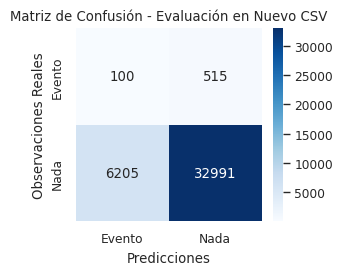

Classification Report:
               precision    recall  f1-score   support

      Evento       0.02      0.16      0.03       615
        Nada       0.98      0.84      0.91     39196

    accuracy                           0.83     39811
   macro avg       0.50      0.50      0.47     39811
weighted avg       0.97      0.83      0.89     39811



In [134]:
# 1. Carga del nuevo CSV
nuevo_csv_path = 'Observaciones con dataset/C-3.csv'  # Cambia la ruta al archivo correspondiente
df_prueba = pd.read_csv(nuevo_csv_path)

# 2. Preprocesamiento del nuevo CSV (aplica las mismas funciones usadas en el conjunto de entrenamiento)
df_prueba = extraer_caracteristicas(df_prueba)

# Separar características y etiquetas
X_prueba = df_prueba.drop(columns=['Observation', 'frame_idx'])  # Asegúrate de quitar solo las columnas necesarias
y_prueba = df_prueba['Observation']

# Normalizar los datos usando el mismo escalador ajustado
X_prueba_scaled = scaler.transform(X_prueba)  # Usa el `scaler` que se ajustó durante el entrenamiento

# Seleccionar las características relevantes con el selector usado anteriormente
X_prueba_selected = selector.transform(X_prueba_scaled)  # Aplica el `selector` para usar solo las características seleccionadas

# 3. Predicción usando el modelo entrenado
y_pred_prueba = model_rf_refined.predict(X_prueba_selected)  # Usa el modelo refinado que fue entrenado con las características seleccionadas

# 4. Evaluación de Resultados
# Visualizar la matriz de confusión
plt.figure(figsize=(3, 2.5))
sns.heatmap(confusion_matrix(y_prueba, y_pred_prueba), annot=True, fmt='d', cmap='Blues', xticklabels=model_rf_refined.classes_, yticklabels=model_rf_refined.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Evaluación en Nuevo CSV')
plt.show()

# Mostrar reporte de clasificación
print("Classification Report:\n", classification_report(y_prueba, y_pred_prueba))




Accuracy (modelo Random Forest combinado): 0.9731794791829097

Classification Report (modelo Random Forest combinado):
               precision    recall  f1-score   support

      Evento       0.94      0.48      0.64       313
        Nada       0.97      1.00      0.99      6100

    accuracy                           0.97      6413
   macro avg       0.96      0.74      0.81      6413
weighted avg       0.97      0.97      0.97      6413



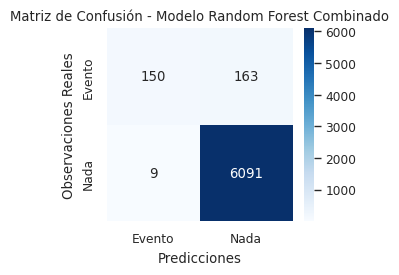

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el nuevo CSV
nuevo_csv_path = 'Observaciones con dataset/C-3.csv'  # Cambia la ruta al archivo correspondiente
df_nuevo = pd.read_csv(nuevo_csv_path)

# 2. Preprocesamiento del nuevo CSV (normalización y extracción de características)
df_nuevo = extraer_caracteristicas(df_nuevo)

# 3. Combinar los conjuntos de datos (original y nuevo)
df_combined = pd.concat([df_balanced, df_nuevo], ignore_index=True)

# Selección de características (excluyendo 'Observation' y 'frame_idx')
X_combined = df_combined.drop(columns=['Observation', 'frame_idx'])
y_combined = df_combined['Observation']

# División del conjunto combinado en entrenamiento y prueba
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined, y_combined, test_size=0.15, random_state=42, stratify=y_combined
)

# Crear el pipeline para normalizar las coordenadas y luego aplicar StandardScaler
pipeline = Pipeline([
    ('normalizar_coordenadas', FunctionTransformer(normalizar_coordenadas, validate=False)),
    ('scaler', StandardScaler())
])

# Ajustar el pipeline y transformar los datos de entrenamiento y prueba
X_train_combined_scaled = pipeline.fit_transform(X_train_combined)
X_test_combined_scaled = pipeline.transform(X_test_combined)

# Reentrenar el modelo Random Forest con el conjunto de datos combinado
model_rf_combined = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
model_rf_combined.fit(X_train_combined_scaled, y_train_combined)

# Predicciones con el modelo reentrenado
y_pred_combined = model_rf_combined.predict(X_test_combined_scaled)

# Evaluación del Modelo reentrenado
print("Accuracy (modelo Random Forest combinado):", accuracy_score(y_test_combined, y_pred_combined))
print("\nClassification Report (modelo Random Forest combinado):\n", classification_report(y_test_combined, y_pred_combined))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(3, 2.5))
sns.heatmap(confusion_matrix(y_test_combined, y_pred_combined), annot=True, fmt='d', cmap='Blues', 
            xticklabels=model_rf_combined.classes_, yticklabels=model_rf_combined.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Modelo Random Forest Combinado')
plt.show()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  29.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  29.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  29.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 1.5min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.5min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  31.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 1.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; t

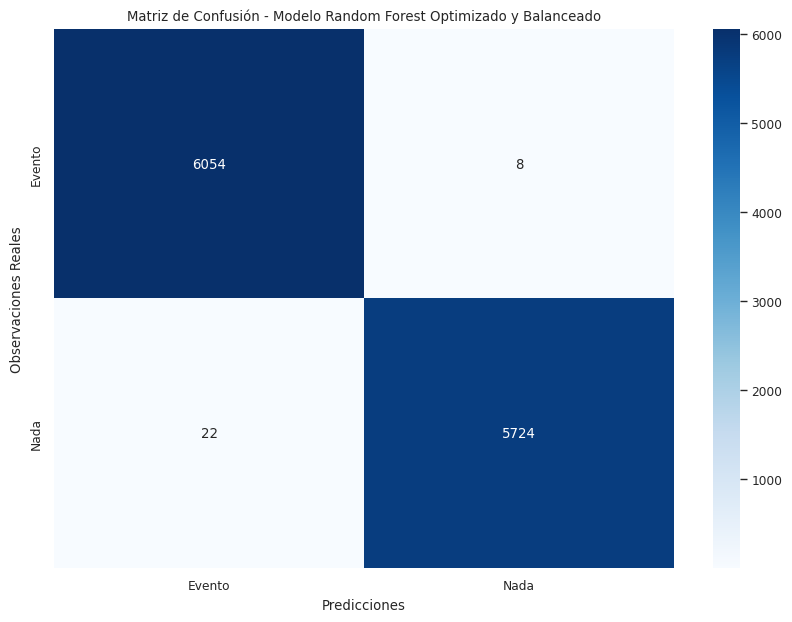

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el nuevo CSV
nuevo_csv_path = 'Observaciones con dataset/C-3.csv'  # Cambia la ruta al archivo correspondiente
df_nuevo = pd.read_csv(nuevo_csv_path)

# 2. Preprocesamiento del nuevo CSV (normalización y extracción de características)
df_nuevo = extraer_caracteristicas(df_nuevo)

# 3. Combinar los conjuntos de datos (original y nuevo)
df_combined = pd.concat([df_balanced, df_nuevo], ignore_index=True)

# Selección de características (excluyendo 'Observation' y 'frame_idx')
X_combined = df_combined.drop(columns=['Observation', 'frame_idx'])
y_combined = df_combined['Observation']

# Balancear las clases utilizando SMOTEENN (combina oversampling y undersampling)
smote_enn = SMOTEENN(random_state=42)
X_combined_balanced, y_combined_balanced = smote_enn.fit_resample(X_combined, y_combined)

# División del conjunto balanceado en entrenamiento y prueba
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X_combined_balanced, y_combined_balanced, test_size=0.15, random_state=42, stratify=y_combined_balanced
)

# Crear el pipeline para normalizar las coordenadas y luego aplicar StandardScaler
pipeline = Pipeline([
    ('normalizar_coordenadas', FunctionTransformer(normalizar_coordenadas, validate=False)),
    ('scaler', StandardScaler())
])

# Ajustar el pipeline y transformar los datos de entrenamiento y prueba
X_train_combined_scaled = pipeline.fit_transform(X_train_combined)
X_test_combined_scaled = pipeline.transform(X_test_combined)

# Definir los hiperparámetros a optimizar para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar el modelo Random Forest con GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,  # Usa todos los núcleos disponibles
    verbose=2
)

# Ajustar GridSearchCV con los datos de entrenamiento balanceados
grid_search.fit(X_train_combined_scaled, y_train_combined)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)

# Reentrenar el modelo con los mejores hiperparámetros
best_model_rf = grid_search.best_estimator_

# Validación cruzada para evaluar la robustez del modelo
cv_scores = cross_val_score(best_model_rf, X_train_combined_scaled, y_train_combined, cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), scoring='accuracy')

# Mostrar los resultados de validación cruzada
print("Resultados de Validación Cruzada (10-Fold) - Modelo Optimizado:")
print(f"Media de Accuracy: {cv_scores.mean():.4f}")
print(f"Desviación Estándar: {cv_scores.std():.4f}")

# Evaluar el modelo en el conjunto de prueba
y_pred_combined = best_model_rf.predict(X_test_combined_scaled)

# Mostrar la precisión y el reporte de clasificación
print("Accuracy (modelo Random Forest optimizado y balanceado):", accuracy_score(y_test_combined, y_pred_combined))
print("\nClassification Report (modelo Random Forest optimizado y balanceado):\n", classification_report(y_test_combined, y_pred_combined))

# Visualización de la Matriz de Confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_combined, y_pred_combined), annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model_rf.classes_, yticklabels=best_model_rf.classes_)
plt.xlabel('Predicciones')
plt.ylabel('Observaciones Reales')
plt.title('Matriz de Confusión - Modelo Random Forest Optimizado y Balanceado')
plt.show()


Modelo guardado en modelo_rf_optimizado.joblib
Confianza de las primeras 5 predicciones: [[0.77       0.23      ]
 [1.         0.        ]
 [0.96666667 0.03333333]
 ...
 [0.96       0.04      ]
 [1.         0.        ]
 [0.03       0.97      ]]


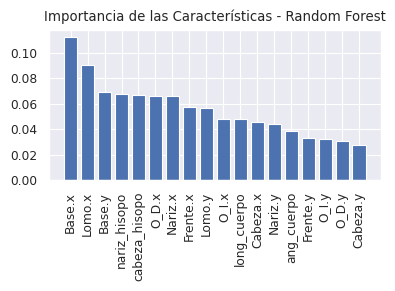

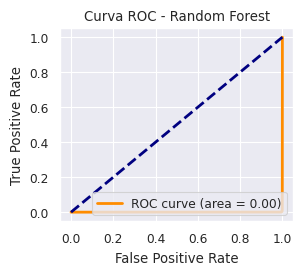

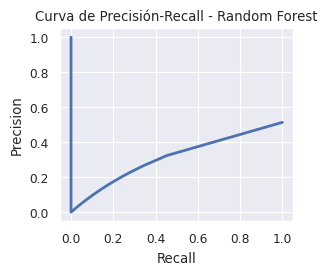

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# 1. Guardar el modelo Random Forest optimizado
modelo_path = 'modelo_rf_optimizado.joblib'
dump(best_model_rf, modelo_path)
print(f"Modelo guardado en {modelo_path}")

# 2. Crear un informe detallado del modelo
def guardar_informe_modelo(model, X_test, y_test, y_pred, cv_scores, file_path):
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Guardar el reporte de clasificación en un archivo de texto
    with open(file_path, 'w') as f:
        f.write(f"Accuracy: {accuracy:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(class_report)
        f.write("\nMatriz de Confusión:\n")
        f.write(pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_).to_string())
        f.write("\n\nResultados de Validación Cruzada (10-Fold):\n")
        f.write(f"Media de Accuracy: {cv_scores.mean():.4f}\n")
        f.write(f"Desviación Estándar: {cv_scores.std():.4f}\n")

    # Visualizar la matriz de confusión y guardarla
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicciones')
    plt.ylabel('Observaciones Reales')
    plt.title('Matriz de Confusión')
    plt.savefig(file_path.replace('.txt', '_matriz_confusion.png'))
    plt.close()

# Guardar el informe del modelo
guardar_informe_modelo(best_model_rf, X_test_combined_scaled, y_test_combined, y_pred_combined, cv_scores, 'informe_modelo_rf.txt')

# 3. Obtener la confianza de las predicciones
y_prob = best_model_rf.predict_proba(X_test_combined_scaled)
print(f"Confianza de las primeras 5 predicciones: {y_prob[10000:15000]}")

# 4. Visualizar la importancia de las características
importances = best_model_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_combined.columns[indices]

plt.figure(figsize=(4, 3))
plt.title("Importancia de las Características - Random Forest")
plt.bar(range(X_combined.shape[1]), importances[indices], align="center")
plt.xticks(range(X_combined.shape[1]), feature_names, rotation=90)
plt.tight_layout()
plt.savefig('importancia_caracteristicas.png')
plt.show()

# 5. Gráficos de ROC y Curvas de Precisión-Recall
fpr, tpr, _ = roc_curve(y_test_combined.map({'Nada': 0, 'Evento': 1}), y_prob[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3, 2.5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.savefig('curva_roc.png')
plt.show()

precision, recall, _ = precision_recall_curve(y_test_combined.map({'Nada': 0, 'Evento': 1}), y_prob[:, 1])

plt.figure(figsize=(3, 2.5))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall - Random Forest')
plt.savefig('curva_precision_recall.png')
plt.show()


In [145]:
from joblib import load
import pandas as pd

def imprimir_informacion_modelo(modelo_path):
    # Cargar el modelo entrenado
    modelo = load(modelo_path)
    
    # Imprimir tipo de modelo
    print(f"Modelo cargado desde: {modelo_path}")
    print(f"Tipo de modelo: {type(modelo).__name__}\n")

    # Imprimir los hiperparámetros del modelo
    print("Hiperparámetros del modelo:")
    print(modelo.get_params())
    print("\n")

    # Intentar obtener las características que el modelo espera
    feature_names = None
    try:
        feature_names = modelo.feature_names_in_
        print(f"Características esperadas por el modelo ({len(feature_names)}):")
        print(feature_names)
    except AttributeError:
        print("El modelo no tiene información sobre las características esperadas.")
    print("\n")

    # Imprimir la importancia de las características (si aplica)
    if hasattr(modelo, "feature_importances_"):
        print("Importancia de las características:")
        if feature_names is not None:
            importances = pd.Series(modelo.feature_importances_, index=feature_names)
        else:
            importances = pd.Series(modelo.feature_importances_, index=[f"Feature {i}" for i in range(len(modelo.feature_importances_))])
        print(importances.sort_values(ascending=False))
        print("\n")

    # Si el modelo tiene clases, imprimirlas
    if hasattr(modelo, "classes_"):
        print("Clases del modelo:")
        print(modelo.classes_)
        print("\n")

    # Imprimir métricas adicionales si están disponibles
    if hasattr(modelo, "oob_score_"):
        print(f"Out-of-Bag Score: {modelo.oob_score_:.4f}")
        print("\n")

    if hasattr(modelo, "n_features_"):
        print(f"Número de características utilizadas: {modelo.n_features_}")
        print("\n")

# Uso de la función
imprimir_informacion_modelo('modelo_rf_optimizado.joblib')


Modelo cargado desde: modelo_rf_optimizado.joblib
Tipo de modelo: RandomForestClassifier

Hiperparámetros del modelo:
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


El modelo no tiene información sobre las características esperadas.


Importancia de las características:
Feature 8     0.112488
Feature 6     0.090653
Feature 9     0.069472
Feature 14    0.067274
Feature 15    0.066869
Feature 0     0.066070
Feature 4     0.065734
Feature 10    0.057121
Feature 7     0.056900
Feature 2     0.048273
Feature 16    0.047782
Feature 12    0.045777
Feature 5     0.044276
Feature 17    0.038336
Feature 11    0.033141
Feature 

In [146]:
# Suponiendo que tienes acceso al DataFrame original de entrenamiento
# Mapea los nombres reales de las características

# Lista de características reales (columnas de X_train_combined)
columnas_originales = X_combined.columns.tolist()  # Asegúrate de usar las columnas correctas

# Mostrar la correspondencia entre los nombres y la importancia de características
importances = best_model_rf.feature_importances_
importancias_con_nombres = pd.Series(importances, index=columnas_originales).sort_values(ascending=False)

# Imprimir la importancia de las características con sus nombres reales
print("Importancia de las características con sus nombres reales:")
print(importancias_con_nombres)


Importancia de las características con sus nombres reales:
Base.x           0.112488
Lomo.x           0.090653
Base.y           0.069472
nariz_hisopo     0.067274
cabeza_hisopo    0.066869
O_D.x            0.066070
Nariz.x          0.065734
Frente.x         0.057121
Lomo.y           0.056900
O_I.x            0.048273
long_cuerpo      0.047782
Cabeza.x         0.045777
Nariz.y          0.044276
ang_cuerpo       0.038336
Frente.y         0.033141
O_I.y            0.032165
O_D.y            0.030513
Cabeza.y         0.027156
dtype: float64


Modelo cargado desde: modelo_rf_optimizado.joblib
CSV cargado desde: Observaciones con dataset/C-3.csv

Predicciones realizadas:
   frame_idx Observation Prediccion    Evento      Nada
0          6        Nada       Nada  0.350000  0.650000
1          7        Nada       Nada  0.343333  0.656667
2          8        Nada       Nada  0.310000  0.690000
3          9        Nada       Nada  0.300000  0.700000
4         10        Nada       Nada  0.300000  0.700000

Resumen de las predicciones realizadas:
  Observation  frame_idx       O_D.x       O_D.y       O_I.x       O_I.y  \
0        Nada          6  435.107819  185.389404  158.906723  159.265442   
1        Nada          7  435.122543  185.190750  158.934799  159.618759   
2        Nada          8  434.190084  184.162338  165.663086  160.193329   
3        Nada          9  432.833855  182.692703  162.602814  162.213104   
4        Nada         10  432.128613  181.952841  165.606644  162.362488   

      Nariz.x     Nariz.y      Lomo.x

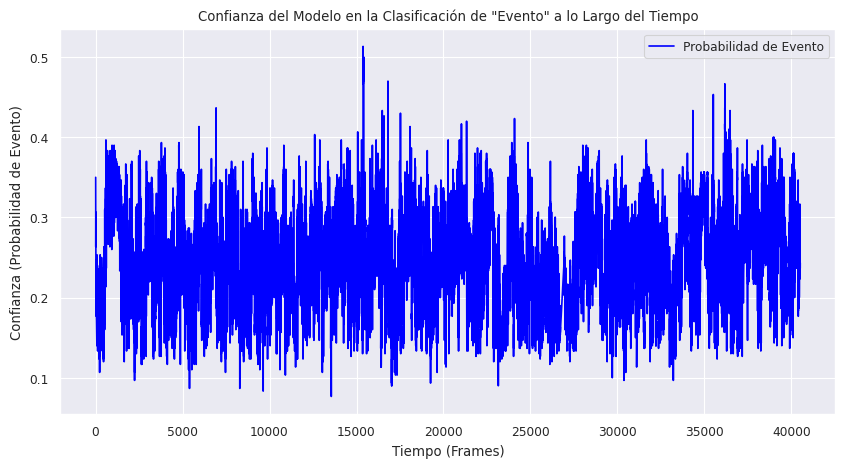

In [152]:
from joblib import load
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Función para cargar el modelo y hacer predicciones usando un nuevo CSV
def cargar_y_predecir(modelo_path, csv_path):
    # 1. Cargar el modelo entrenado
    modelo = load(modelo_path)
    print(f"Modelo cargado desde: {modelo_path}")

    # 2. Cargar y preprocesar el nuevo CSV
    df_nuevo = pd.read_csv(csv_path)
    print(f"CSV cargado desde: {csv_path}")

    # 3. Extraer características usando la función ya definida
    df_nuevo = extraer_caracteristicas(df_nuevo)

    # 4. Seleccionar las características utilizadas por el modelo
    # Usamos los nombres de las características más importantes que ya identificaste
    columnas_relevantes = [
        'Base.x', 'Lomo.x', 'Base.y', 'nariz_hisopo', 'cabeza_hisopo', 'O_D.x', 
        'Nariz.x', 'Frente.x', 'Lomo.y', 'O_I.x', 'long_cuerpo', 'Cabeza.x', 
        'Nariz.y', 'ang_cuerpo', 'Frente.y', 'O_I.y', 'O_D.y', 'Cabeza.y'
    ]
    X_nuevo = df_nuevo[columnas_relevantes]

    # 5. Aplicar el escalado (StandardScaler)
    scaler = StandardScaler()
    X_nuevo_scaled = scaler.fit_transform(X_nuevo)  # Si el scaler fue guardado, carga en vez de ajustar de nuevo

    # 6. Realizar predicciones con el modelo
    y_pred = modelo.predict(X_nuevo_scaled)

    # 7. Obtener las probabilidades de las predicciones (confianza)
    y_prob = modelo.predict_proba(X_nuevo_scaled)
    confianzas = pd.DataFrame(y_prob, columns=modelo.classes_)

    # 8. Añadir las predicciones al DataFrame y mostrar los resultados
    df_nuevo['Prediccion'] = y_pred
    df_nuevo = pd.concat([df_nuevo, confianzas], axis=1)

    # Mostrar un resumen de las predicciones realizadas
    print("\nPredicciones realizadas:")
    print(df_nuevo[['frame_idx', 'Observation', 'Prediccion'] + list(confianzas.columns)].head())

    return df_nuevo

# Uso de la función para cargar y predecir con un nuevo CSV
df_resultado = cargar_y_predecir('modelo_rf_optimizado.joblib', 'Observaciones con dataset/C-3.csv')

# Mostrar un resumen de los resultados
print("\nResumen de las predicciones realizadas:")
print(df_resultado.head())


import matplotlib.pyplot as plt

def graficar_confianza_evento(df):
    # Filtrar solo las probabilidades de "Evento"
    if 'Evento' not in df.columns:
        print("La columna de probabilidades para 'Evento' no está presente en el DataFrame.")
        return

    # Extraer los frames y las probabilidades de ser "Evento"
    frames = df['frame_idx']
    prob_evento = df['Evento']  # Asegúrate de que esta columna exista y contenga las probabilidades de "Evento"

    # Crear el gráfico
    plt.figure(figsize=(10, 5))
    plt.plot(frames, prob_evento, linestyle='-', color='blue', label='Probabilidad de Evento')
    plt.xlabel('Tiempo (Frames)')
    plt.ylabel('Confianza (Probabilidad de Evento)')
    plt.title('Confianza del Modelo en la Clasificación de "Evento" a lo Largo del Tiempo')
    plt.grid(True)
    plt.legend()
    plt.show()

# Usar la función con el DataFrame resultante
graficar_confianza_evento(df_resultado)



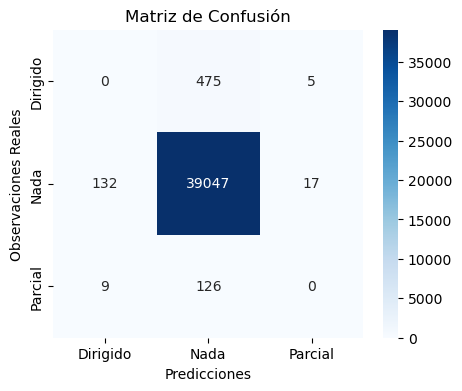

Classification Report:
               precision    recall  f1-score   support

    Dirigido       0.00      0.00      0.00       480
        Nada       0.98      1.00      0.99     39196
     Parcial       0.00      0.00      0.00       135

    accuracy                           0.98     39811
   macro avg       0.33      0.33      0.33     39811
weighted avg       0.97      0.98      0.98     39811



In [18]:
# 1. Carga del nuevo CSV
nuevo_csv_path = 'Observaciones con dataset/C-3.csv'  # Cambia la ruta al archivo correspondiente
df_prueba = pd.read_csv(nuevo_csv_path)

# 2. Preprocesamiento del nuevo CSV (aplica las mismas funciones usadas en el conjunto de entrenamiento)
# Normalización y extracción de características
df_prueba = extraer_caracteristicas(df_prueba)

# Separar características y etiquetas
X_prueba = df_prueba.drop(columns=['Observation'])
y_prueba = df_prueba['Observation']

# 3. Predicción usando el modelo entrenado
y_pred_prueba = model.predict(X_prueba)

# 4. Evaluación de Resultados
# Visualizar la matriz de confusión
visualizar_matriz_confusion(y_prueba, y_pred_prueba)

# Mostrar reporte de clasificación
print("Classification Report:\n", classification_report(y_prueba, y_pred_prueba))


Como vemos, no sirvió entrenar el modelo sólo con un dataset. Vamos a tratar de hacer lo mismo combinando los tres que me pasó Lorena.

Observation
Nada        117494
Dirigido      1605
Parcial        555
Name: count, dtype: int64


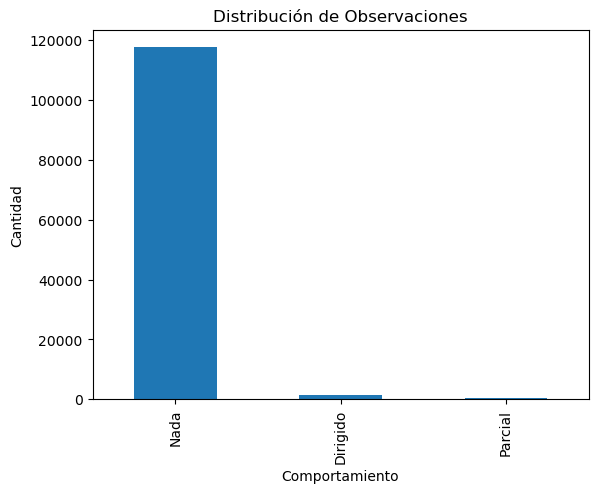

{'Gini Index': 0.03557678242377693, 'Shannon Index': 0.10064472408506399, 'Min-Max Ratio': 0.004723645462747034, 'Chi2 p-value': 1.0, 'Balanced': False}


,Observation,frame_idx,O_D.x,O_D.y,O_I.x,O_I.y,Nariz.x,Nariz.y,Lomo.x,Lomo.y,...,Nariz.x_norm,Nariz.y_norm,Lomo.x_norm,Lomo.y_norm,Base.x_norm,Base.y_norm,Frente.x_norm,Frente.y_norm,Cabeza.x_norm,Cabeza.y_norm
0,Nada,50,321.192627,136.379272,272.988678,146.080521,271.406298,114.394726,298.966370,149.456879,...,0.521935,0.466917,0.574935,0.610028,0.552456,0.760138,0.463137,0.569581,0.531932,0.547349
1,Nada,51,318.348206,136.520096,273.289032,143.410721,265.401036,114.726516,298.714233,149.603226,...,0.510387,0.468271,0.574450,0.610625,0.556376,0.759741,0.459260,0.582629,0.526853,0.548369
2,Nada,52,318.118073,136.666260,273.339355,143.307755,259.085324,115.059498,295.780151,152.504517,...,0.498241,0.469631,0.568808,0.622467,0.559785,0.759456,0.456173,0.591441,0.522958,0.550956
3,Nada,53,318.086365,136.595367,273.147797,143.308990,257.259332,117.052327,295.766663,152.498901,...,0.494729,0.477765,0.568782,0.622444,0.563027,0.759261,0.456089,0.592939,0.521952,0.553293
4,Nada,54,318.004089,136.563995,273.178131,143.321487,255.742612,118.355877,295.843079,152.465683,...,0.491813,0.483085,0.568929,0.622309,0.565950,0.759112,0.456225,0.588503,0.521232,0.553494


In [30]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy, chi2_contingency

# Función para normalizar las coordenadas en rango [0, 1] basado en las dimensiones del video (520x245)
def normalizar_coordenadas(df):
    dimensiones = (520, 245)  # Ancho y alto del video
    for col in df.columns:
        if '.x' in col:
            df[col + '_norm'] = df[col] / dimensiones[0]
        elif '.y' in col:
            df[col + '_norm'] = df[col] / dimensiones[1]
    return df

# Función para calcular la distancia entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Función para extraer características del comportamiento
def extraer_caracteristicas(df):
    # Distancia de la nariz al hisopo (270, 50)
    df['dist_hisopo'] = calcular_distancia(df['Nariz.x'], df['Nariz.y'], 270, 50)
    
    # Distancia entre oreja derecha e izquierda
    df['dist_orejas'] = calcular_distancia(df['O_D.x'], df['O_D.y'], df['O_I.x'], df['O_I.y'])
    
    # Velocidad de la nariz entre frames consecutivos
    df['vel_nariz'] = calcular_distancia(
        df['Nariz.x'].shift(1), df['Nariz.y'].shift(1), df['Nariz.x'], df['Nariz.y'])
    
    # Normalizar coordenadas
    df = normalizar_coordenadas(df)
    
    return df

# Función para evaluar el balance de las observaciones
def evaluar_balanceo(observations):
    # Calcular conteos
    counts = observations.value_counts()
    total = counts.sum()

    # Índice de Gini
    gini_index = 1 - sum((counts / total) ** 2)

    # Índice de Shannon (Entropía)
    shannon_index = entropy(counts)

    # Ratio Min-Max
    min_max_ratio = counts.min() / counts.max()

    # Test Chi-Cuadrado
    chi2, p_value = chi2_contingency([counts.values])[0:2]

    # Umbrales de balanceo
    is_balanced = min_max_ratio > 0.5 and gini_index > 0.6 and p_value > 0.05

    return {
        "Gini Index": gini_index,
        "Shannon Index": shannon_index,
        "Min-Max Ratio": min_max_ratio,
        "Chi2 p-value": p_value,
        "Balanced": is_balanced
    }

# Cargar y combinar los CSV
csv_paths = ['Observaciones con dataset/A-7.csv', 'Observaciones con dataset/B-4.csv', 'Observaciones con dataset/C-3.csv']  # Reemplaza con las rutas correctas
dfs = [pd.read_csv(path) for path in csv_paths]

# Aplicar preprocesamiento a cada DataFrame y combinar
dfs_procesados = [extraer_caracteristicas(df) for df in dfs]
df_combinado = pd.concat(dfs_procesados, ignore_index=True)

# Estadísticas básicas de las observaciones
observation_counts = df_combinado['Observation'].value_counts()
print(observation_counts)

# Visualización del balance de las clases
observation_counts.plot(kind='bar', title='Distribución de Observaciones', ylabel='Cantidad', xlabel='Comportamiento')
plt.show()

# Evaluar balanceo de las observaciones
resultado_balanceo = evaluar_balanceo(df_combinado['Observation'])
print(resultado_balanceo)

df_combinado.head()


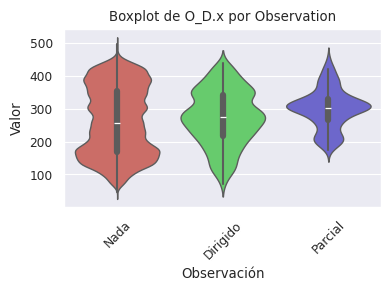

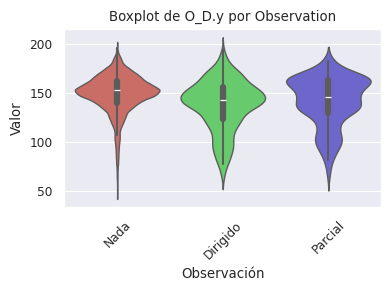

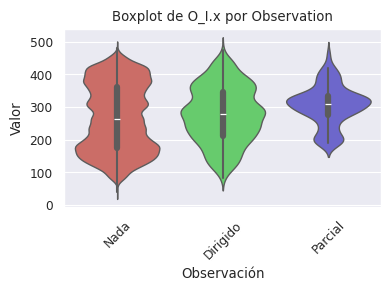

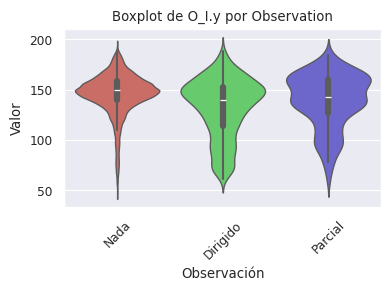

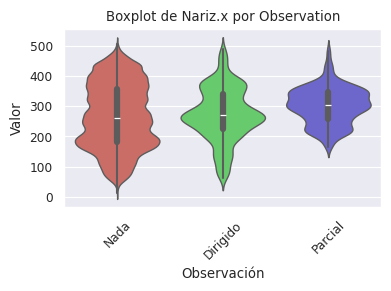

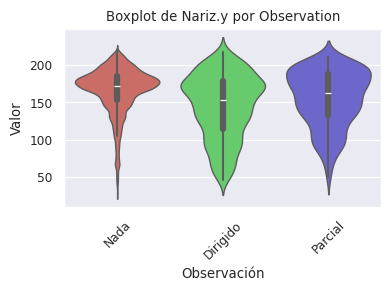

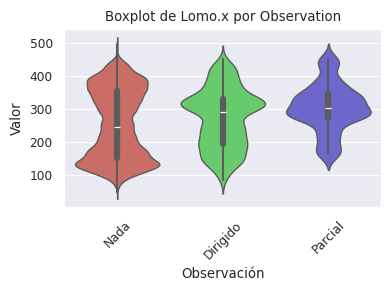

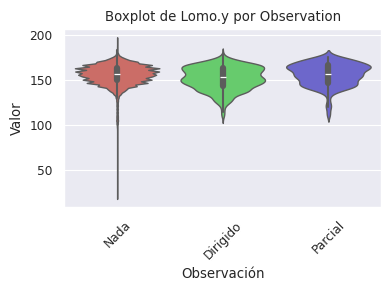

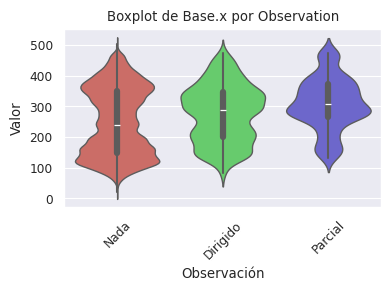

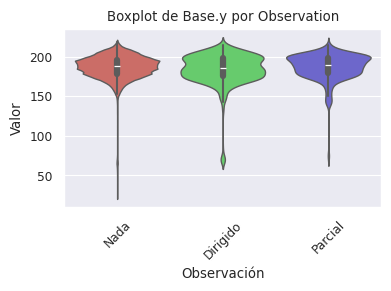

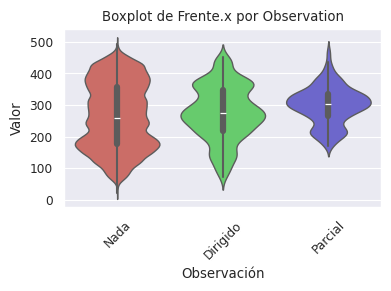

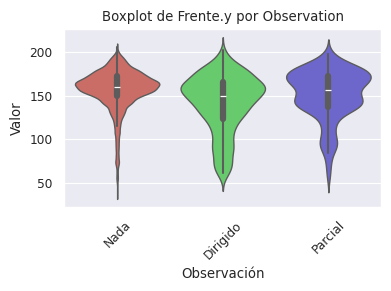

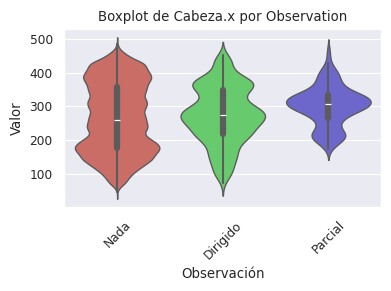

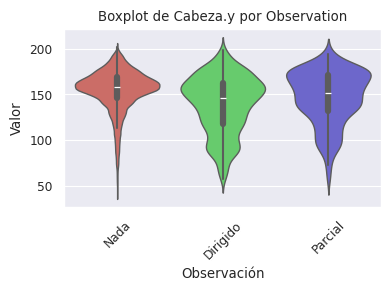

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas originales que contienen '.x' o '.y' y la columna 'Observation'
columnas_interes = [col for col in df_combinado.columns if ('.x' in col or '.y' in col) and 'norm' not in col]
df_original = df_combinado[columnas_interes + ['Observation']]

# Crear un boxplot para cada columna original discriminando por observación
sns.set_theme('paper')
sns.color_palette("hls", 3)
for col in columnas_interes:
    plt.figure(figsize=(4, 3))
    sns.violinplot(x='Observation', y=col, data=df_original,hue='Observation', palette="hls")
    plt.title(f'Boxplot de {col} por Observation')
    plt.xticks(rotation=45)
    plt.ylabel('Valor')
    plt.xlabel('Observación')
    plt.tight_layout()
    plt.show()


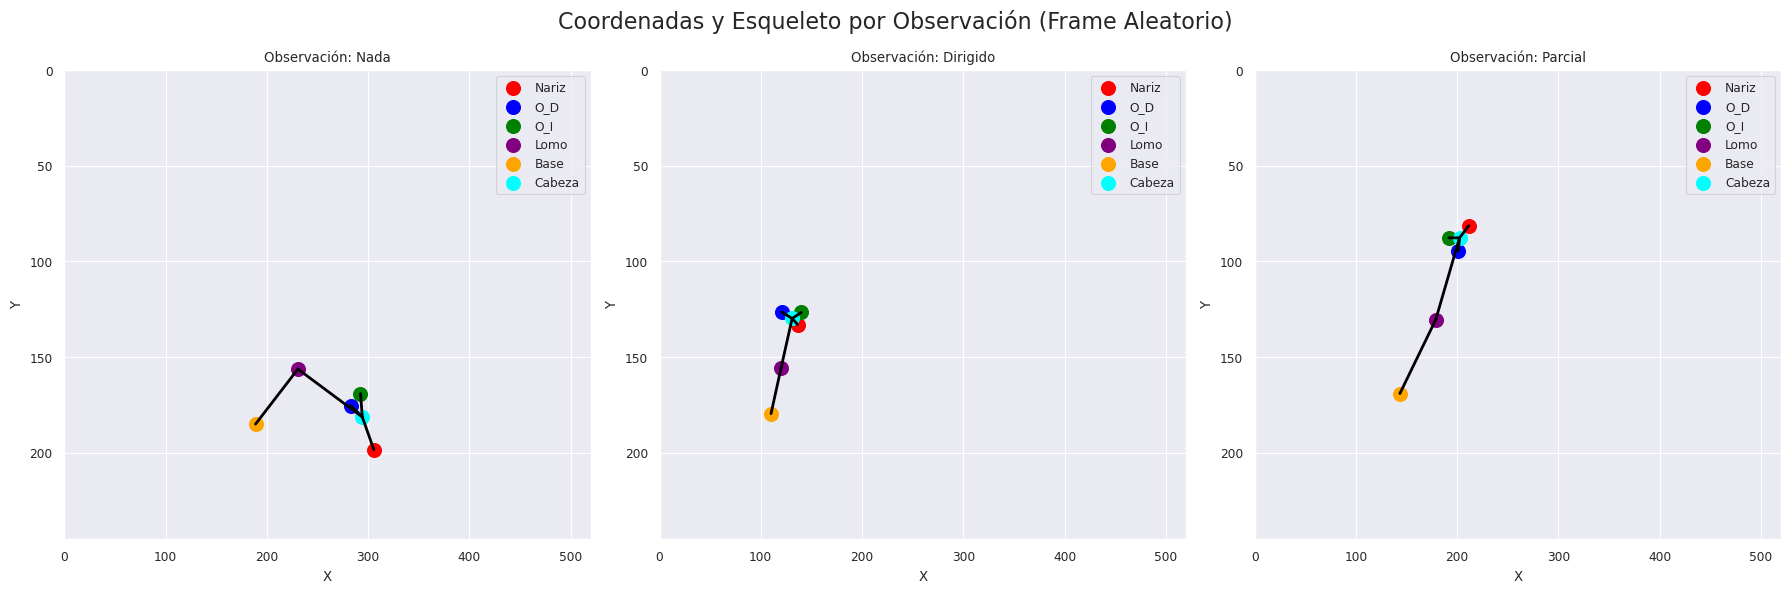

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Filtrar un frame aleatorio para cada observación
observaciones = df_nuevo['Observation'].unique()
frames_aleatorios = {}

# Seleccionar un frame aleatorio para cada observación
for obs in observaciones:
    frames_aleatorios[obs] = df_combinado[df_combinado['Observation'] == obs].sample(n=1, random_state=np.random.randint(0, 10000))

# Colores y etiquetas de los puntos para graficar
puntos = ['Nariz', 'O_D', 'O_I', 'Lomo', 'Base', 'Cabeza']
colores = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']

# Definir conexiones del esqueleto (pares de puntos que deben conectarse)
conexiones = [('Nariz', 'Cabeza'), ('Cabeza', 'O_D'), ('Cabeza', 'O_I'), ('Cabeza', 'Lomo'), ('Lomo', 'Base')]

# Crear los plots
fig, axes = plt.subplots(1, len(observaciones), figsize=(18, 6))
fig.suptitle('Coordenadas y Esqueleto por Observación (Frame Aleatorio)', fontsize=16)

# Plotear cada observación en un subplot
for i, (obs, frame) in enumerate(frames_aleatorios.items()):
    ax = axes[i]
    # Graficar los puntos
    for punto, color in zip(puntos, colores):
        ax.scatter(frame[f'{punto}.x'], frame[f'{punto}.y'], color=color, label=punto, s=100)
    
    # Dibujar las conexiones del esqueleto
    for p1, p2 in conexiones:
        ax.plot([frame[f'{p1}.x'].values[0], frame[f'{p2}.x'].values[0]],
                [frame[f'{p1}.y'].values[0], frame[f'{p2}.y'].values[0]],
                color='black', linestyle='-', linewidth=2)
    
    ax.set_title(f'Observación: {obs}')
    ax.set_xlim(0, 520)  # Ajusta según el ancho del video
    ax.set_ylim(0, 245)  # Ajusta según la altura del video
    ax.invert_yaxis()  # Invertir el eje y para que coincida con la visualización típica de imágenes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

plt.tight_layout()
plt.show()


In [75]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter

# Función para calcular la distancia entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Función para detectar y corregir outliers en las posiciones usando el filtro de Savitzky-Golay
def corregir_outliers(df, puntos, ventana=5, umbral=30):
    df_corrigido = df.copy()

    # Aplicar suavizado temporal y corrección de outliers
    for punto in puntos:
        # Suavizado de la trayectoria del punto
        df_corrigido[f'{punto}.x_smooth'] = savgol_filter(df_corrigido[f'{punto}.x'], window_length=ventana, polyorder=2, mode='nearest')
        df_corrigido[f'{punto}.y_smooth'] = savgol_filter(df_corrigido[f'{punto}.y'], window_length=ventana, polyorder=2, mode='nearest')
        
        # Calcular la distancia entre el punto detectado y el suavizado
        distancia = calcular_distancia(df_corrigido[f'{punto}.x'], df_corrigido[f'{punto}.y'],
                                       df_corrigido[f'{punto}.x_smooth'], df_corrigido[f'{punto}.y_smooth'])
        
        # Detectar y corregir outliers (puntos muy lejanos)
        outliers = distancia > umbral
        df_corrigido.loc[outliers, f'{punto}.x'] = df_corrigido.loc[outliers, f'{punto}.x_smooth']
        df_corrigido.loc[outliers, f'{punto}.y'] = df_corrigido.loc[outliers, f'{punto}.y_smooth']

    # Eliminar columnas auxiliares
    df_corrigido = df_corrigido.drop(columns=[f'{punto}.x_smooth' for punto in puntos] + [f'{punto}.y_smooth' for punto in puntos])
    
    return df_corrigido

# Aplicar la corrección de outliers a los puntos de interés
puntos_interes = ['Nariz', 'O_D', 'O_I', 'Lomo', 'Base', 'Cabeza']
df_corregido = corregir_outliers(df_combinado, puntos_interes)

# Mostrar una muestra de los datos corregidos
df_corregido.head()


,Observation,frame_idx,O_D.x,O_D.y,O_I.x,O_I.y,Nariz.x,Nariz.y,Lomo.x,Lomo.y,...,Nariz.x_norm,Nariz.y_norm,Lomo.x_norm,Lomo.y_norm,Base.x_norm,Base.y_norm,Frente.x_norm,Frente.y_norm,Cabeza.x_norm,Cabeza.y_norm
0,Nada,50,321.192627,136.379272,272.988678,146.080521,271.406298,114.394726,298.966370,149.456879,...,0.521935,0.466917,0.574935,0.610028,0.552456,0.760138,0.463137,0.569581,0.531932,0.547349
1,Nada,51,318.348206,136.520096,273.289032,143.410721,265.401036,114.726516,298.714233,149.603226,...,0.510387,0.468271,0.574450,0.610625,0.556376,0.759741,0.459260,0.582629,0.526853,0.548369
2,Nada,52,318.118073,136.666260,273.339355,143.307755,259.085324,115.059498,295.780151,152.504517,...,0.498241,0.469631,0.568808,0.622467,0.559785,0.759456,0.456173,0.591441,0.522958,0.550956
3,Nada,53,318.086365,136.595367,273.147797,143.308990,257.259332,117.052327,295.766663,152.498901,...,0.494729,0.477765,0.568782,0.622444,0.563027,0.759261,0.456089,0.592939,0.521952,0.553293
4,Nada,54,318.004089,136.563995,273.178131,143.321487,255.742612,118.355877,295.843079,152.465683,...,0.491813,0.483085,0.568929,0.622309,0.565950,0.759112,0.456225,0.588503,0.521232,0.553494


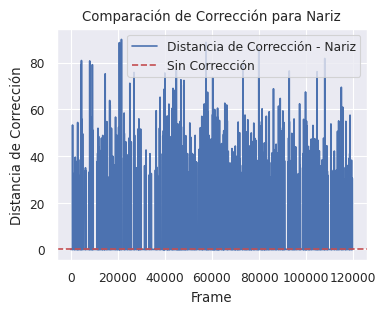

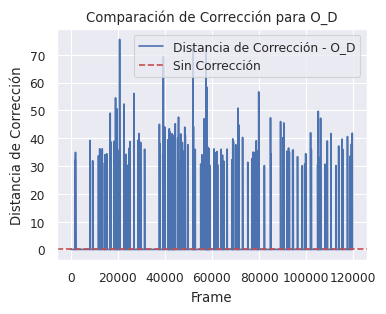

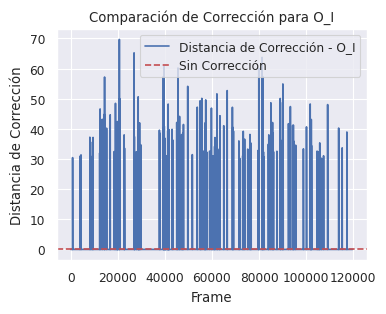

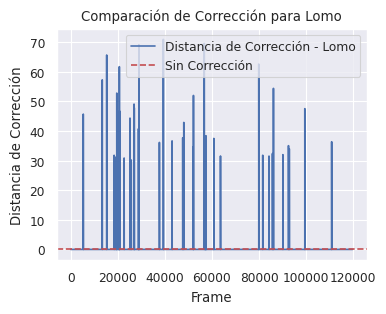

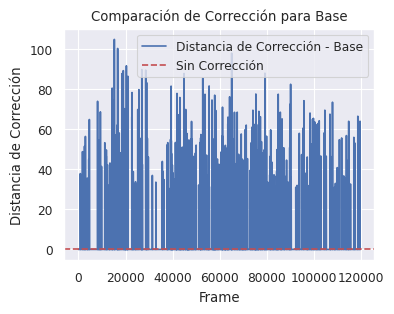

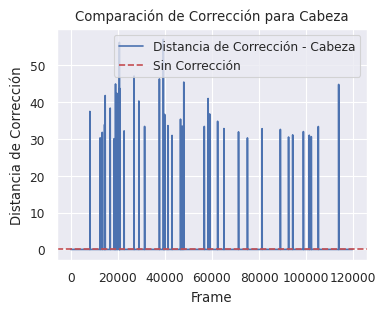

    Punto  Correcciones Totales  Distancia Media de Corrección  \
0   Nariz                  1412                      40.190938   
1     O_D                   251                      38.051102   
2     O_I                   303                      38.384321   
3    Lomo                   102                      39.566685   
4    Base                  1185                      42.918834   
5  Cabeza                    62                      36.741398   

   Distancia Máxima de Corrección  Porcentaje de Corrección  
0                       89.880361                  1.180069  
1                       75.520891                  0.209772  
2                       69.688244                  0.253230  
3                       70.958116                  0.085246  
4                      104.828326                  0.990356  
5                       56.965516                  0.051816  


In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Función para calcular la distancia entre dos puntos
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Comparar los puntos originales con los corregidos y calcular las distancias de corrección
def comparar_puntos(df_original, df_corregido, puntos):
    comparacion = {}
    for punto in puntos:
        distancia_correccion = calcular_distancia(
            df_original[f'{punto}.x'], df_original[f'{punto}.y'],
            df_corregido[f'{punto}.x'], df_corregido[f'{punto}.y']
        )
        comparacion[punto] = {
            'distancia': distancia_correccion,
            'corregido': distancia_correccion > 0  # True si hubo corrección
        }
    return comparacion

# Aplicar la comparación entre el original y el corregido
puntos_interes = ['Nariz', 'O_D', 'O_I', 'Lomo', 'Base', 'Cabeza']
comparacion = comparar_puntos(df_combinado, df_corregido, puntos_interes)

# Crear gráficos para visualizar las correcciones
for punto, data in comparacion.items():
    plt.figure(figsize=(4, 3))
    plt.plot(data['distancia'], label=f'Distancia de Corrección - {punto}')
    plt.axhline(y=0, color='r', linestyle='--', label='Sin Corrección')
    plt.title(f'Comparación de Corrección para {punto}')
    plt.xlabel('Frame')
    plt.ylabel('Distancia de Corrección')
    plt.legend()
    plt.show()

# Resumen de estadísticas de corrección
estadisticas = {
    'Punto': [],
    'Correcciones Totales': [],
    'Distancia Media de Corrección': [],
    'Distancia Máxima de Corrección': [],
    'Porcentaje de Corrección': []
}

for punto, data in comparacion.items():
    correcciones_totales = np.sum(data['corregido'])
    distancia_media = np.mean(data['distancia'][data['corregido']])
    distancia_maxima = np.max(data['distancia'][data['corregido']])
    porcentaje_correccion = (correcciones_totales / len(data['distancia'])) * 100
    
    estadisticas['Punto'].append(punto)
    estadisticas['Correcciones Totales'].append(correcciones_totales)
    estadisticas['Distancia Media de Corrección'].append(distancia_media)
    estadisticas['Distancia Máxima de Corrección'].append(distancia_maxima)
    estadisticas['Porcentaje de Corrección'].append(porcentaje_correccion)

# Crear un DataFrame para visualizar las estadísticas de corrección
df_estadisticas = pd.DataFrame(estadisticas)

# Mostrar las estadísticas calculadas
print(df_estadisticas)


In [66]:
import pandas as pd
import numpy as np

# Supongamos que df_combinado ya contiene las columnas originales y la columna de 'Observation'

# Calcular la distancia entre dos puntos (fórmula euclidiana)
def calcular_distancia(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Calcular la velocidad de cada punto utilizando una ventana de 30 frames
def calcular_velocidad(df, punto_x, punto_y, ventana=30):
    velocidad = calcular_distancia(
        df[punto_x].shift(ventana), 
        df[punto_y].shift(ventana), 
        df[punto_x], 
        df[punto_y]
    ) / ventana  # Distancia recorrida dividida por el número de frames
    return velocidad

# Calcular el ángulo formado por los puntos: Cabeza - Lomo - Base
def calcular_angulo(df):
    # Vectores entre los puntos
    vector1 = np.column_stack((df['Cabeza.x'] - df['Lomo.x'], df['Cabeza.y'] - df['Lomo.y']))
    vector2 = np.column_stack((df['Base.x'] - df['Lomo.x'], df['Base.y'] - df['Lomo.y']))

    # Producto punto y normas de los vectores
    dot_product = np.einsum('ij,ij->i', vector1, vector2)
    norm1 = np.linalg.norm(vector1, axis=1)
    norm2 = np.linalg.norm(vector2, axis=1)

    # Ángulo entre los vectores
    angles = np.arccos(dot_product / (norm1 * norm2))
    return np.degrees(angles)  # Convertir a grados

# Calcular la longitud del cuerpo entre la Cabeza y la Base
def calcular_longitud_cuerpo(df):
    return calcular_distancia(df['Cabeza.x'], df['Cabeza.y'], df['Base.x'], df['Base.y'])

# Crear el nuevo DataFrame con los cálculos
df_nuevo = pd.DataFrame({
    'velocidad_Nariz': calcular_velocidad(df_combinado, 'Nariz.x', 'Nariz.y'),
    'velocidad_Cabeza': calcular_velocidad(df_combinado, 'Cabeza.x', 'Cabeza.y'),
    'distancia_hisopo_Nariz': calcular_distancia(df_combinado['Nariz.x'], df_combinado['Nariz.y'], 270, 50),
    'distancia_hisopo_Cabeza': calcular_distancia(df_combinado['Cabeza.x'], df_combinado['Cabeza.y'], 270, 50),
    'angulo_Cabeza_Lomo_Base': calcular_angulo(df_combinado),
    'longitud_cuerpo': calcular_longitud_cuerpo(df_combinado),
    'Observation': df_combinado['Observation']  # Mantener las observaciones originales
})

# Mostrar las primeras filas del DataFrame resultante
df_nuevo.head()


,velocidad_Nariz,velocidad_Cabeza,distancia_hisopo_Nariz,distancia_hisopo_Cabeza,angulo_Cabeza_Lomo_Base,longitud_cuerpo,Observation
0,NaN,NaN,64.410080,84.359381,106.845805,53.214429,Nada
1,NaN,NaN,64.889694,84.443442,107.216599,54.013949,Nada
2,NaN,NaN,65.968693,85.006232,118.352497,54.554294,Nada
3,NaN,NaN,68.252027,85.568381,119.725809,54.796478,Nada
4,NaN,NaN,69.826922,85.612451,121.559623,55.484256,Nada



Métrica: velocidad_Nariz
ANOVA: F-statistic = nan, p-value = nan
Kruskal-Wallis: H-statistic = nan, p-value = nan

Métrica: velocidad_Cabeza
ANOVA: F-statistic = nan, p-value = nan
Kruskal-Wallis: H-statistic = nan, p-value = nan

Métrica: distancia_hisopo_Nariz
ANOVA: F-statistic = 715.03, p-value = 0.0000
Kruskal-Wallis: H-statistic = 819.00, p-value = 0.0000

Métrica: distancia_hisopo_Cabeza
ANOVA: F-statistic = 643.42, p-value = 0.0000
Kruskal-Wallis: H-statistic = 877.28, p-value = 0.0000

Métrica: angulo_Cabeza_Lomo_Base
ANOVA: F-statistic = 104.43, p-value = 0.0000
Kruskal-Wallis: H-statistic = 417.15, p-value = 0.0000

Métrica: longitud_cuerpo
ANOVA: F-statistic = 146.69, p-value = 0.0000
Kruskal-Wallis: H-statistic = 257.76, p-value = 0.0000

Importancia de las métricas según Random Forest:
                   Métrica  Importancia
2   distancia_hisopo_Nariz     0.185447
3  distancia_hisopo_Cabeza     0.179257
5          longitud_cuerpo     0.166334
4  angulo_Cabeza_Lomo_Base  

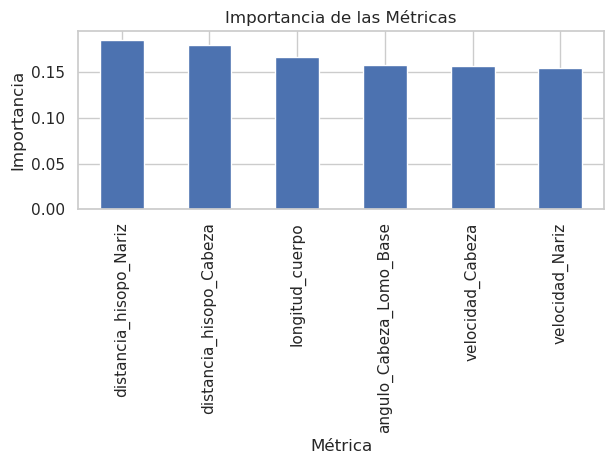

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Visualización de boxplots para cada métrica por observación
metricas = ['velocidad_Nariz', 'velocidad_Cabeza', 'distancia_hisopo_Nariz', 
            'distancia_hisopo_Cabeza', 'angulo_Cabeza_Lomo_Base', 'longitud_cuerpo']

# Pruebas estadísticas: ANOVA y Kruskal-Wallis para cada métrica
for metrica in metricas:
    # Preparar los datos para ANOVA y Kruskal-Wallis
    grupos = [df_nuevo[df_nuevo['Observation'] == obs][metrica] for obs in df_nuevo['Observation'].unique()]
    
    # Realizar ANOVA
    anova_result = f_oneway(*grupos)
    
    # Realizar Kruskal-Wallis
    kruskal_result = kruskal(*grupos)
    
    print(f'\nMétrica: {metrica}')
    print(f'ANOVA: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}')
    print(f'Kruskal-Wallis: H-statistic = {kruskal_result.statistic:.2f}, p-value = {kruskal_result.pvalue:.4f}')

# Clasificación de importancia de métricas con Random Forest
# Convertir las observaciones en etiquetas numéricas
df_nuevo['Observation_encoded'] = pd.factorize(df_nuevo['Observation'])[0]

# Separar características y etiquetas
X = df_nuevo[metricas]
y = df_nuevo['Observation_encoded']

# Crear y entrenar un modelo de Random Forest para evaluar la importancia de las métricas
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Evaluar la importancia de las métricas
importancia_metricas = pd.DataFrame({
    'Métrica': metricas,
    'Importancia': model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de las métricas
print("\nImportancia de las métricas según Random Forest:")
print(importancia_metricas)

# Visualización de la importancia de las métricas
importancia_metricas.plot(kind='bar', x='Métrica', y='Importancia', legend=False, title='Importancia de las Métricas')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()


Accuracy: 0.9833270653127743

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     23499
           1       0.82      0.10      0.18       321
           2       0.73      0.10      0.17       111

    accuracy                           0.98     23931
   macro avg       0.85      0.40      0.45     23931
weighted avg       0.98      0.98      0.98     23931



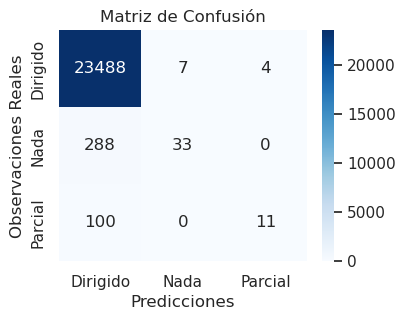


Importancia de las Métricas en el Modelo de Predicción:
                   Métrica  Importancia
0   distancia_hisopo_Nariz     0.342174
1  distancia_hisopo_Cabeza     0.335041
2          longitud_cuerpo     0.322785


<Figure size 400x300 with 0 Axes>

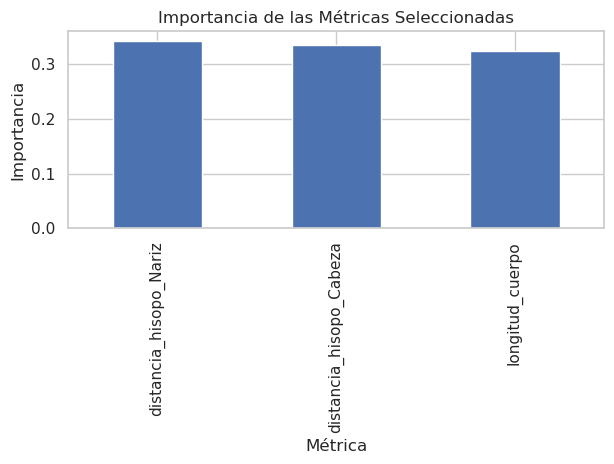

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las métricas más relevantes según la importancia calculada previamente
# Supongamos que seleccionamos las 3 métricas más importantes
metricas_relevantes = importancia_metricas.head(3)['Métrica'].tolist()  # Ajusta el número según los resultados

# Crear un nuevo DataFrame solo con las métricas relevantes y la observación
X_relevantes = df_nuevo[metricas_relevantes]
y = df_nuevo['Observation_encoded']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_relevantes, y, test_size=0.2, stratify=y)

# Entrenar un modelo de Random Forest con las métricas relevantes
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
def visualizar_matriz_confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    labels = sorted(df_nuevo['Observation'].unique())
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicciones')
    plt.ylabel('Observaciones Reales')
    plt.title('Matriz de Confusión')
    plt.show()

# Mostrar la matriz de confusión
visualizar_matriz_confusion(y_test, y_pred)

# Evaluar la importancia de las métricas seleccionadas en el modelo final
importancia_final = pd.DataFrame({
    'Métrica': metricas_relevantes,
    'Importancia': modelo_rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

# Mostrar la importancia de las métricas seleccionadas
print("\nImportancia de las Métricas en el Modelo de Predicción:")
print(importancia_final)

# Visualizar la importancia de las métricas seleccionadas
plt.figure(figsize=(4, 3))
importancia_final.plot(kind='bar', x='Métrica', y='Importancia', legend=False, title='Importancia de las Métricas Seleccionadas')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()


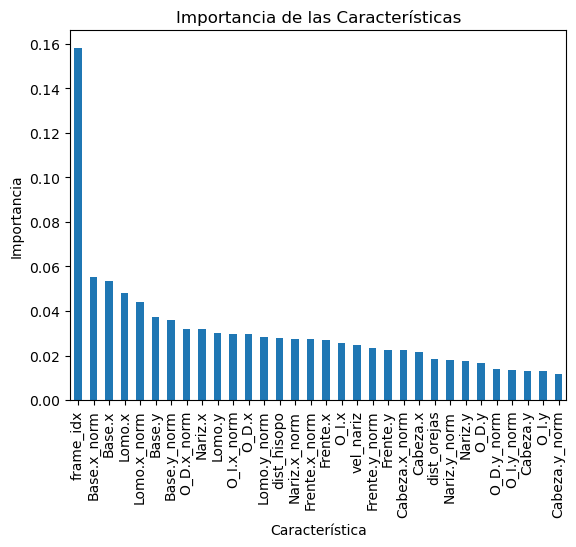

   Característica  Importancia
0       frame_idx     0.158001
26    Base.x_norm     0.055335
9          Base.x     0.053358
7          Lomo.x     0.048170
24    Lomo.x_norm     0.044086


KeyboardInterrupt: 

In [36]:
# Obtener la importancia de las características
importancia = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de cada característica
importancia_df = pd.DataFrame({
    'Característica': X_res.columns,
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

# Visualizar la importancia de las características
importancia_df.plot(kind='bar', x='Característica', y='Importancia', legend=False, title='Importancia de las Características')
plt.ylabel('Importancia')
plt.show()

# Mostrar las características más importantes
print(importancia_df.head())

import shap

# Crear el explainer de SHAP para el modelo
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualizar las explicaciones de las predicciones
shap.summary_plot(shap_values, X_test, plot_type="bar")  # Resumen de importancia global
shap.summary_plot(shap_values, X_test)  # Distribución de la influencia de las características
